In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
data = pd.read_csv(r"C:\Users\srike\OneDrive\Desktop\Data Analytics\python\Zomatodata.csv")


In [25]:
print(data.head())

                    name online_order book_table   rate  votes   
0                  Jalsa          Yes        Yes  4.1/5    775  \
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [27]:
# To find Duplicates

In [28]:
data.duplicated().sum()

0

In [29]:
# To find null values

In [30]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Text(0.5, 0, 'Type of restaurant')

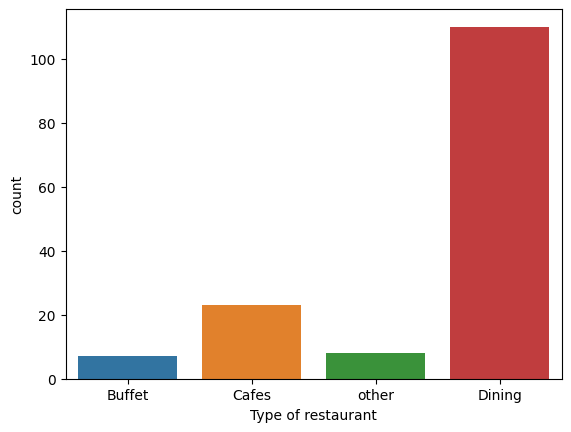

In [31]:
# Type of Restaurants
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of restaurant")


In [32]:
# The above countplot shows that majority of ' Restaurant is Dining ' 

In [33]:
# To know the Restaurant name that has maximum votes

max_votes = data['votes'].max()
restaurant_with_max_votes = data.loc[data['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

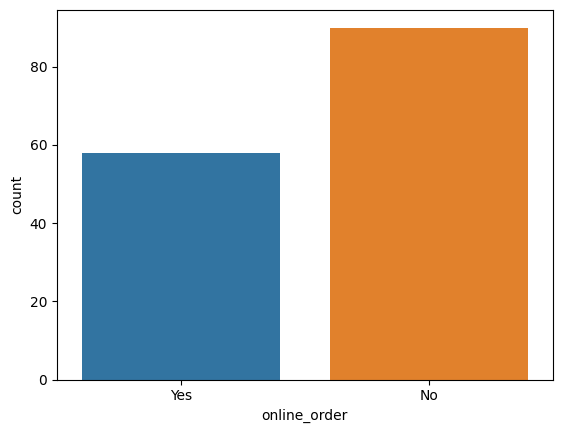

In [34]:
# Online Order

sns.countplot(x=data['online_order'])


In [35]:
# Rate column

def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

data['rate']=data['rate'].apply(handleRate)
print(data.head())


                    name online_order book_table  rate  votes   
0                  Jalsa          Yes        Yes   4.1    775  \
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


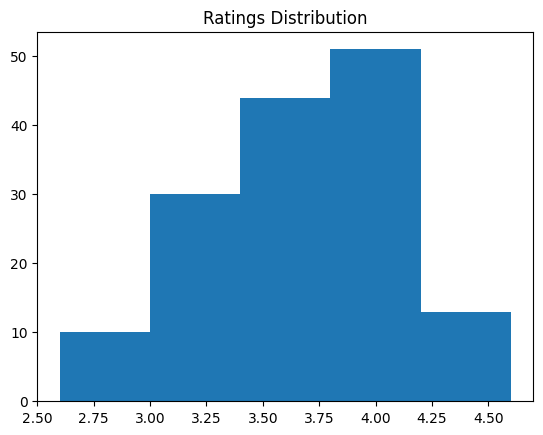

In [36]:
plt.hist(data['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

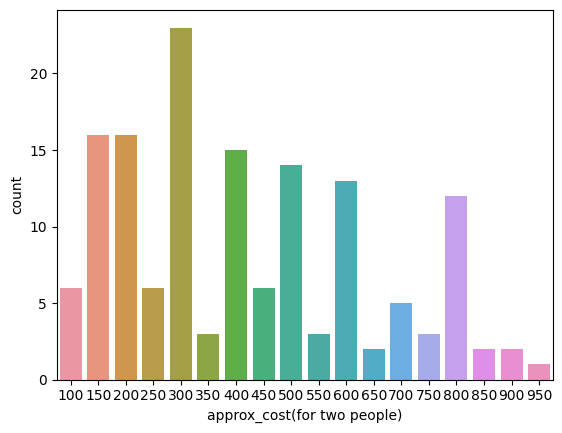

In [37]:
# approx_cost(for two people)

couple_data=data['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

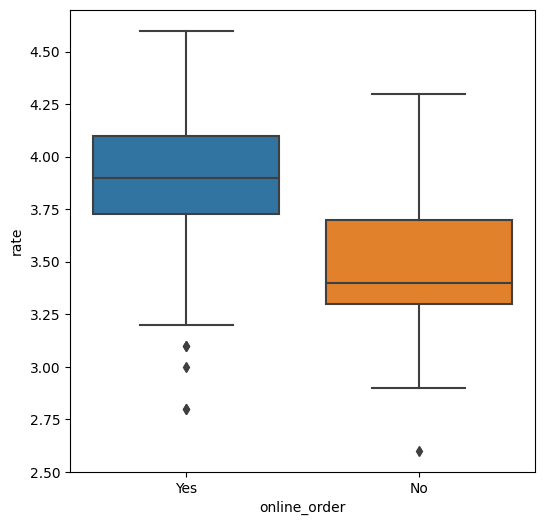

In [38]:
# whether online orders receive higher ratings than offline orders
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = data)


In [39]:
# In above Offline orders received lower ratings in comparison to online orders

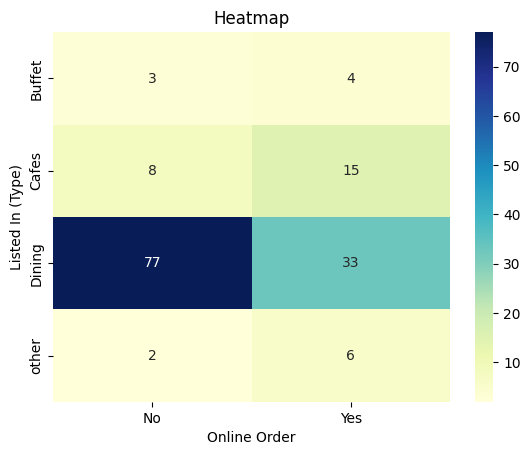

In [40]:
crosstab = pd.crosstab(data['listed_in(type)'], data['online_order'])
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


In [41]:
# Dining restaurants primarily accept offline orders,
# whereas cafes primarily receive online orders.
# This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.